## Outlier Treatment

In [79]:
## Loading necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
data = pd.read_csv('boston_data.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


Checking for null values and type of fields in the data

In [125]:
data.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [56]:
data.isnull().sum() # This is to check if we have any null values in the data

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

Summarizing our data

In [57]:
data.describe() # This will tell us 25th, 50th and 75% percentile of each column in data frame. We can also see Mean, SD , count and min and max of the data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [80]:
from scipy import stats
import pylab 

# Visualizing our data

Checking for outliers in each column by visualizing it

In [59]:
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

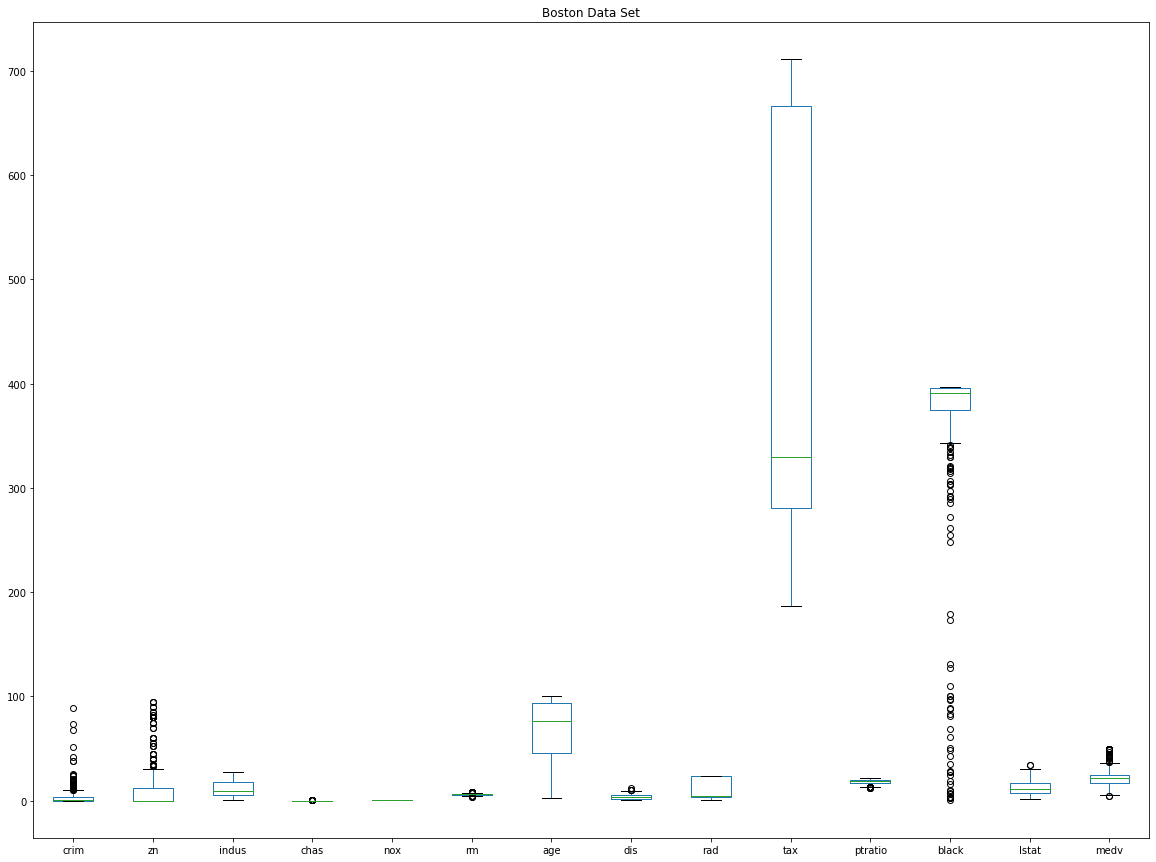

In [60]:
plt.rcParams['figure.figsize'] = (20,15)
data[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv']].plot(kind='box', title='Boston Data Set')
plt.show()

We can see maximum number of outliers are in `black` column, we will use another technique to see count of outliers in each column

Since we have lot of outliers lets create `IQR` value for each column in dataframe and count the Outlier values in each column

In [126]:
outliers= (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)) # Identifying outliers in each column with IQR formula
outliers.sum()

crim       18
zn         65
indus       0
chas        0
nox         0
rm          0
age        66
dis         0
rad         0
tax        74
ptratio     0
black      80
lstat      13
medv       27
dtype: int64

## Lets Transform our data to remove outliers from our dataset

In [63]:
# As we can see many columns have outliers and number of outliers is not same. So we will try multiple ways to transform our data. 

# Step 1 = Remove all values which have outliers with the help of Trimming
# Step 2 = Replace all outlier values to their nearest IQR value

## STEP 1 - Remove

In [127]:
data.shape

(404, 14)

Our original data has 404 rows and 14 columns

In [128]:
# Below code will create IQR value for each column in dataset

In [129]:
Q1 = data.quantile(0.25) # Identifying 25th percentile 
Q3 = data.quantile(0.75) # Identifyong 75th percentile
IQR = Q3 - Q1 # Getting IQR value
IQR # IQR value for each column

crim         3.970775
zn          12.500000
indus       12.910000
chas         0.000000
nox          0.178000
rm           0.726500
age         48.350000
dis          3.134250
rad         20.000000
tax        385.000000
ptratio      2.825000
black       21.297500
lstat        9.775000
medv         7.900000
dtype: float64

In [130]:
outliers= (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)) # Identifying outliers in each column with IQR formula
outliers # Values which are True are outliers

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,False,False,False,False,False,False,False,False,False,False,False,False,False,False
400,True,False,False,False,False,False,False,False,False,False,False,True,False,False
401,False,True,False,True,False,True,False,False,False,False,False,False,False,True
402,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [131]:
outliers= data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))). any(axis=1)]
outliers.shape # Removing outliers from our dataset

(228, 14)

In [132]:
outliers

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,0.06899,0.0,25.65,0.0,0.581,5.870,69.7,2.2577,2.0,188.0,19.1,389.15,14.37,22.0
397,0.10084,0.0,10.01,0.0,0.547,6.715,81.6,2.6775,6.0,432.0,17.8,395.59,10.16,22.8
398,0.67191,0.0,8.14,0.0,0.538,5.813,90.3,4.6820,4.0,307.0,21.0,376.88,14.81,16.6
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1


## STEP 2 - Replace

In [133]:
## Lets replace each column with outliers to be replaced with their respetive Lower bound or Upper bound value

In [134]:
IQR = data['crim'].quantile(0.75) - data['crim'].quantile(0.25)
lower_limit = data['crim'].quantile(0.25) - (IQR * 1.5)
upper_limit = data['crim'].quantile(0.75) + (IQR * 1.5)
IQR

3.970775

C:\Users\jaich\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='df_replaced'>

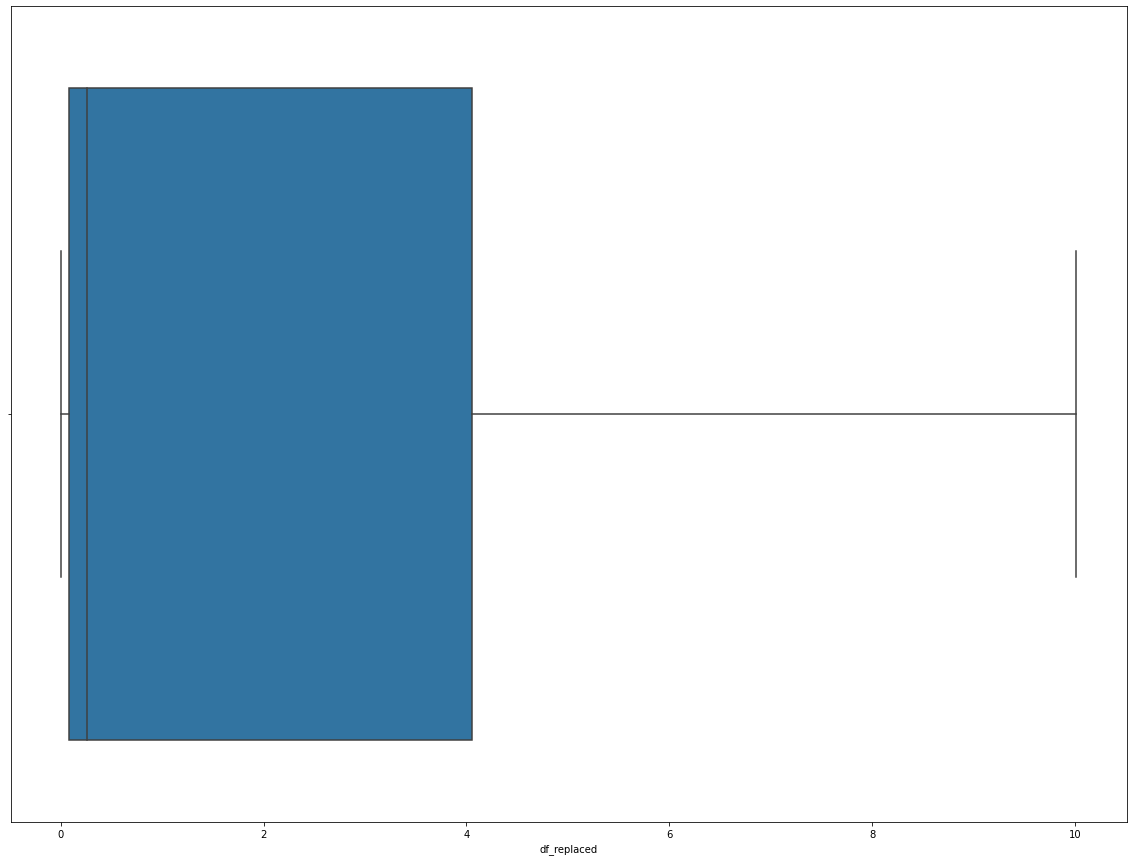

In [135]:
data['df_replaced'] = pd.DataFrame(np.where(data['crim'] > upper_limit, upper_limit, np.where(data['crim'] < lower_limit, lower_limit, data['crim'])))
sns.boxplot(data.df_replaced) # We replaced all outliers value with their upper limit or lower limit.


C:\Users\jaich\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='df_zn_replaced'>

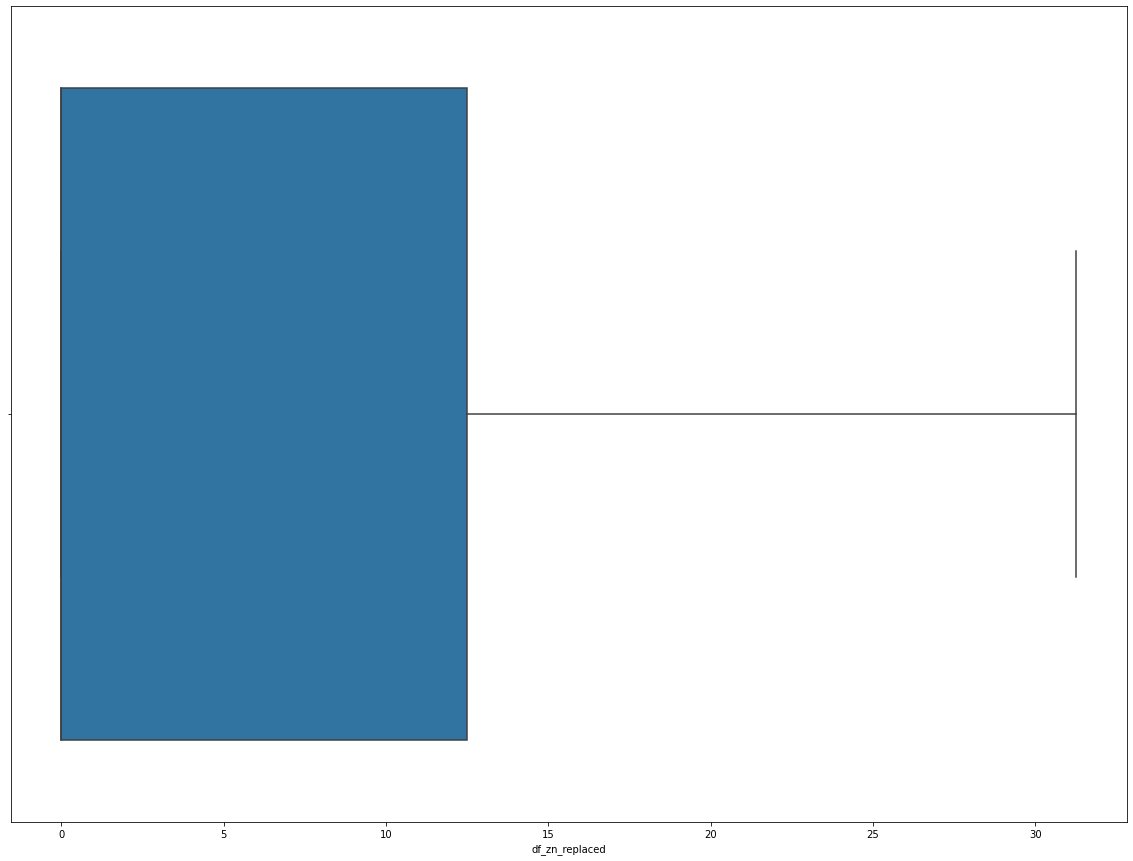

In [136]:
IQR = data['zn'].quantile(0.75) - data['zn'].quantile(0.25)
lower_limit = data['zn'].quantile(0.25) - (IQR * 1.5)
upper_limit = data['zn'].quantile(0.75) + (IQR * 1.5)
IQR

data['df_zn_replaced'] = pd.DataFrame(np.where(data['zn'] > upper_limit, upper_limit, np.where(data['zn'] < lower_limit, lower_limit, data['zn'])))
sns.boxplot(data.df_zn_replaced) # We replaced all outliers value with their upper limit or lower limit.

C:\Users\jaich\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='df_chas_replaced'>

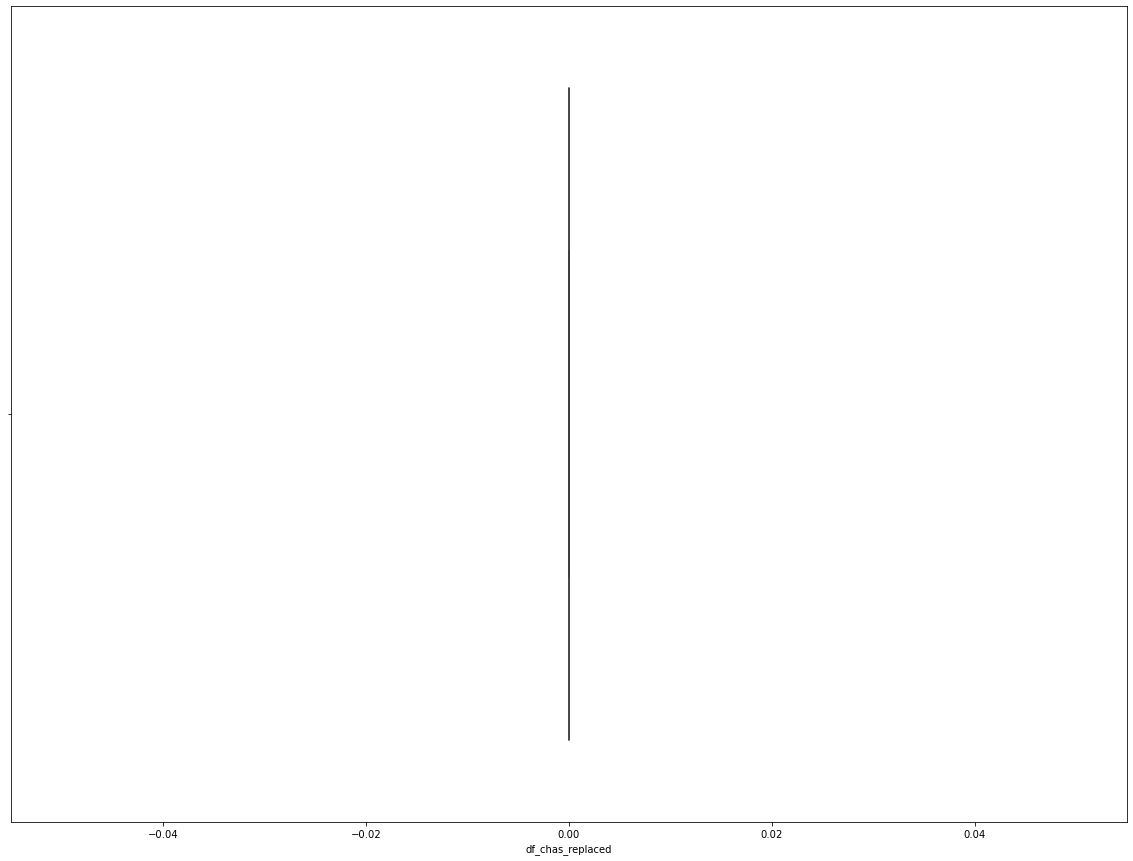

In [137]:
# Replacing values in Chas column
IQR = data['chas'].quantile(0.75) - data['chas'].quantile(0.25)
lower_limit = data['chas'].quantile(0.25) - (IQR * 1.5)
upper_limit = data['chas'].quantile(0.75) + (IQR * 1.5)
IQR

data['df_chas_replaced'] = pd.DataFrame(np.where(data['chas'] > upper_limit, upper_limit, np.where(data['chas'] < lower_limit, lower_limit, data['chas'])))
sns.boxplot(data.df_chas_replaced) # We replaced all outliers value with their upper limit or lower limit.

C:\Users\jaich\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='df_rm_replaced'>

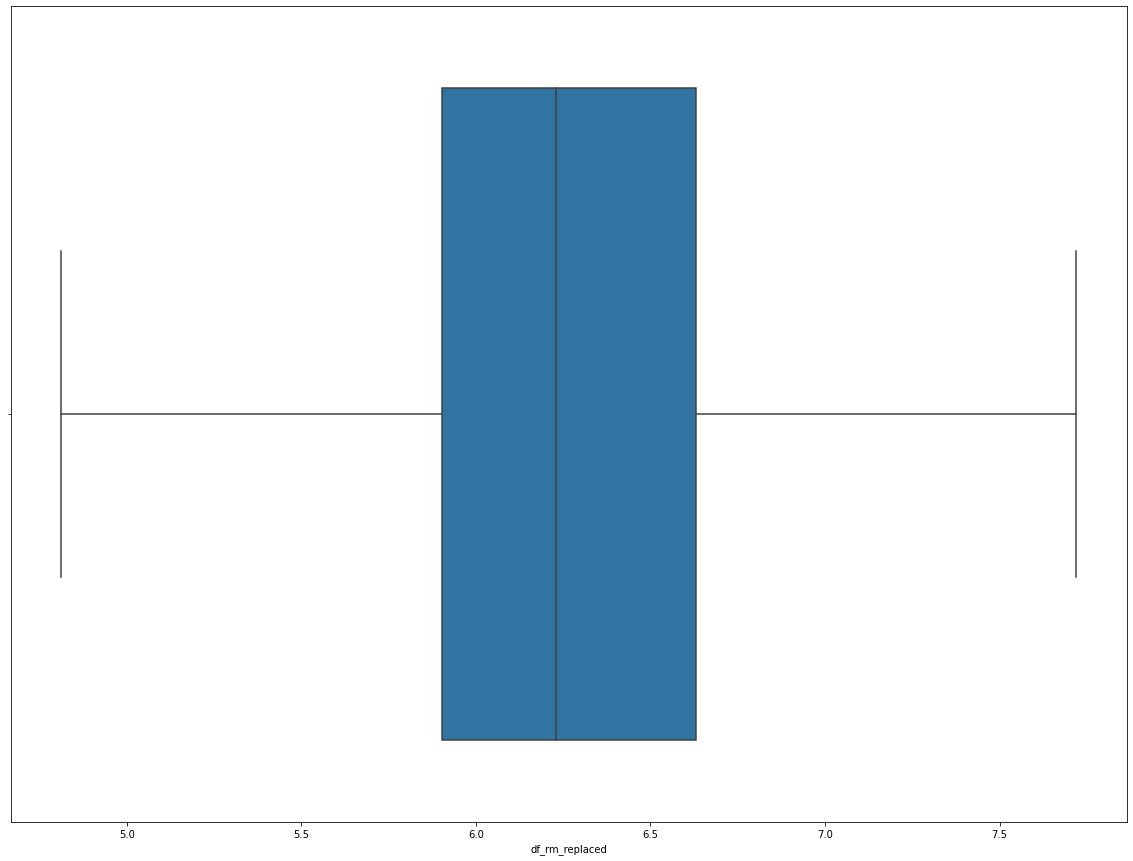

In [138]:
# Replacing values in rm column
IQR = data['rm'].quantile(0.75) - data['rm'].quantile(0.25)
lower_limit = data['rm'].quantile(0.25) - (IQR * 1.5)
upper_limit = data['rm'].quantile(0.75) + (IQR * 1.5)
IQR

data['df_rm_replaced'] = pd.DataFrame(np.where(data['rm'] > upper_limit, upper_limit, np.where(data['rm'] < lower_limit, lower_limit, data['rm'])))
sns.boxplot(data.df_rm_replaced) # We replaced all outliers value with their upper limit or lower limit.

C:\Users\jaich\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='df_dis_replaced'>

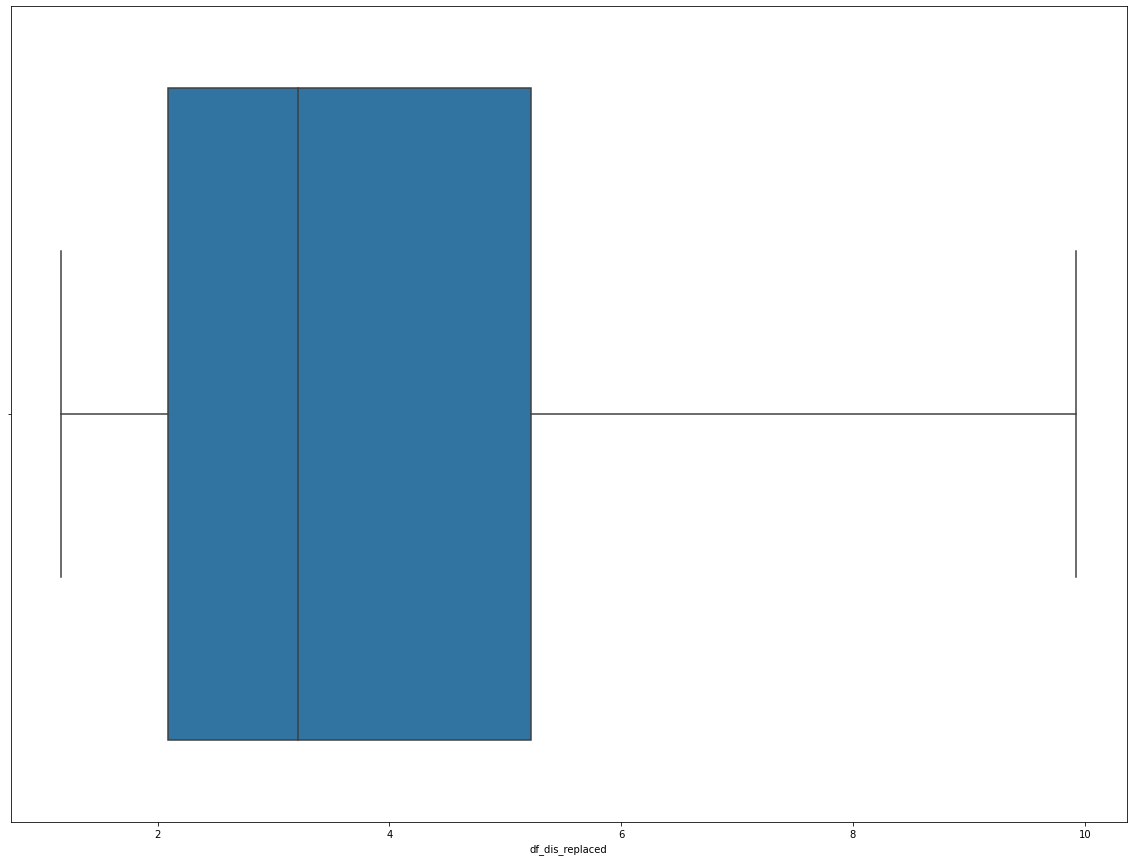

In [139]:
# Replacing values in dis column
IQR = data['dis'].quantile(0.75) - data['dis'].quantile(0.25)
lower_limit = data['dis'].quantile(0.25) - (IQR * 1.5)
upper_limit = data['dis'].quantile(0.75) + (IQR * 1.5)
IQR

data['df_dis_replaced'] = pd.DataFrame(np.where(data['dis'] > upper_limit, upper_limit, np.where(data['dis'] < lower_limit, lower_limit, data['dis'])))
sns.boxplot(data.df_dis_replaced) # We replaced all outliers value with their upper limit or lower limit.

C:\Users\jaich\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='df_ptratio_replaced'>

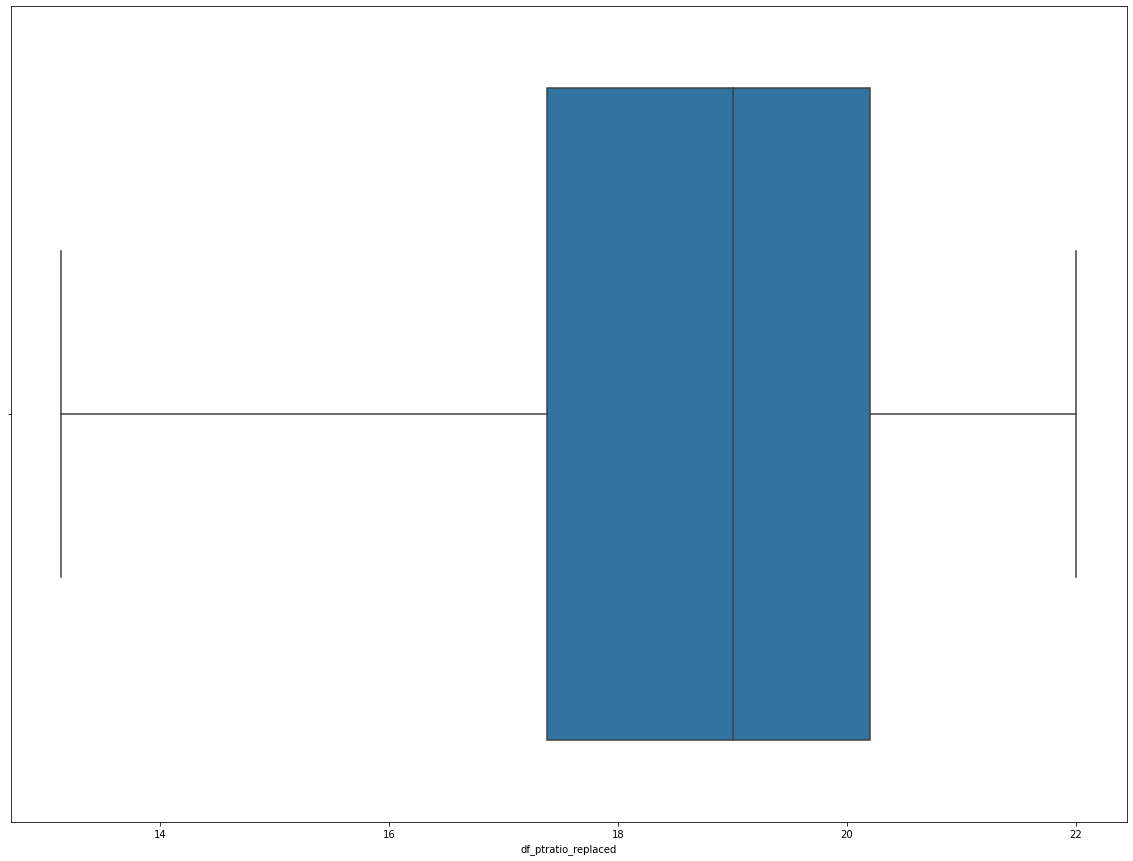

In [140]:
# Replacing values in ptratio column
IQR = data['ptratio'].quantile(0.75) - data['ptratio'].quantile(0.25)
lower_limit = data['ptratio'].quantile(0.25) - (IQR * 1.5)
upper_limit = data['ptratio'].quantile(0.75) + (IQR * 1.5)
IQR

data['df_ptratio_replaced'] = pd.DataFrame(np.where(data['ptratio'] > upper_limit, upper_limit, np.where(data['ptratio'] < lower_limit, lower_limit, data['ptratio'])))
sns.boxplot(data.df_ptratio_replaced) # We replaced all outliers value with their upper limit or lower limit.

C:\Users\jaich\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='df_black_replaced'>

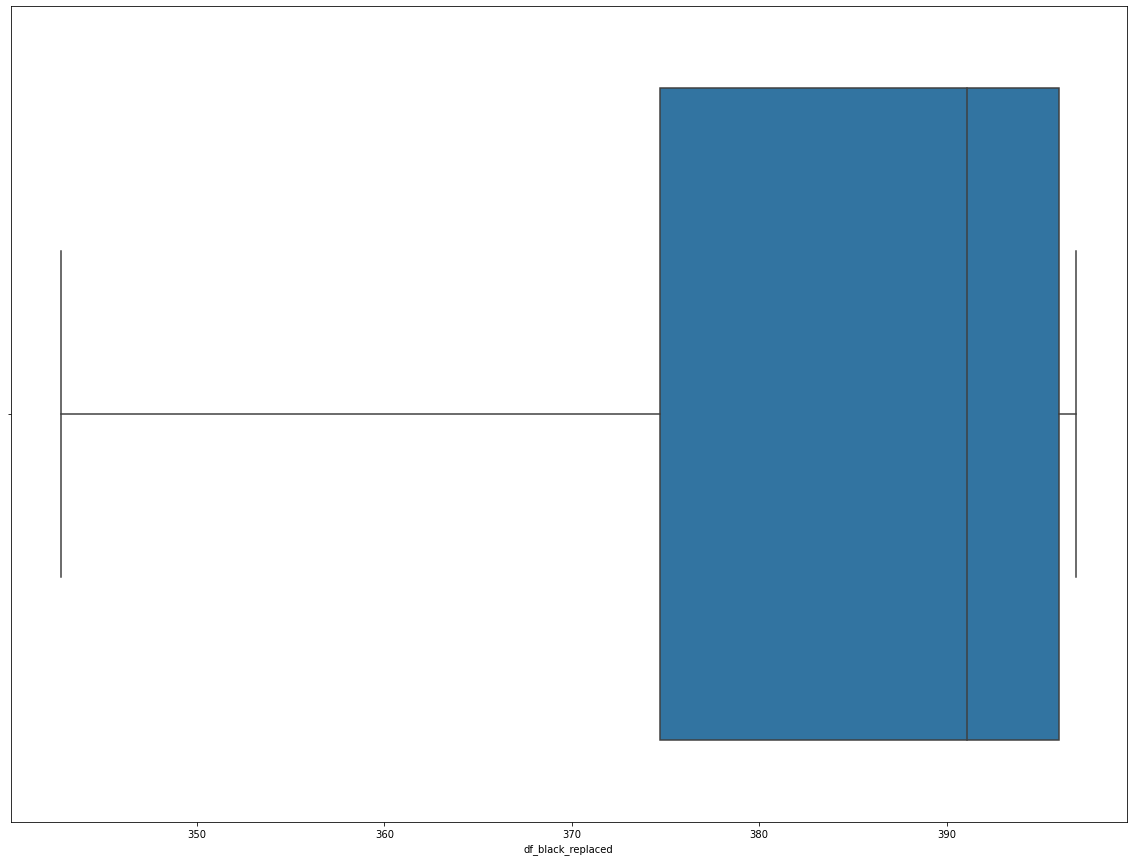

In [141]:
# Replacing values in black column
IQR = data['black'].quantile(0.75) - data['black'].quantile(0.25)
lower_limit = data['black'].quantile(0.25) - (IQR * 1.5)
upper_limit = data['black'].quantile(0.75) + (IQR * 1.5)
IQR

data['df_black_replaced'] = pd.DataFrame(np.where(data['black'] > upper_limit, upper_limit, np.where(data['black'] < lower_limit, lower_limit, data['black'])))
sns.boxplot(data.df_black_replaced) # We replaced all outliers value with their upper limit or lower limit.

C:\Users\jaich\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='df_lstat_replaced'>

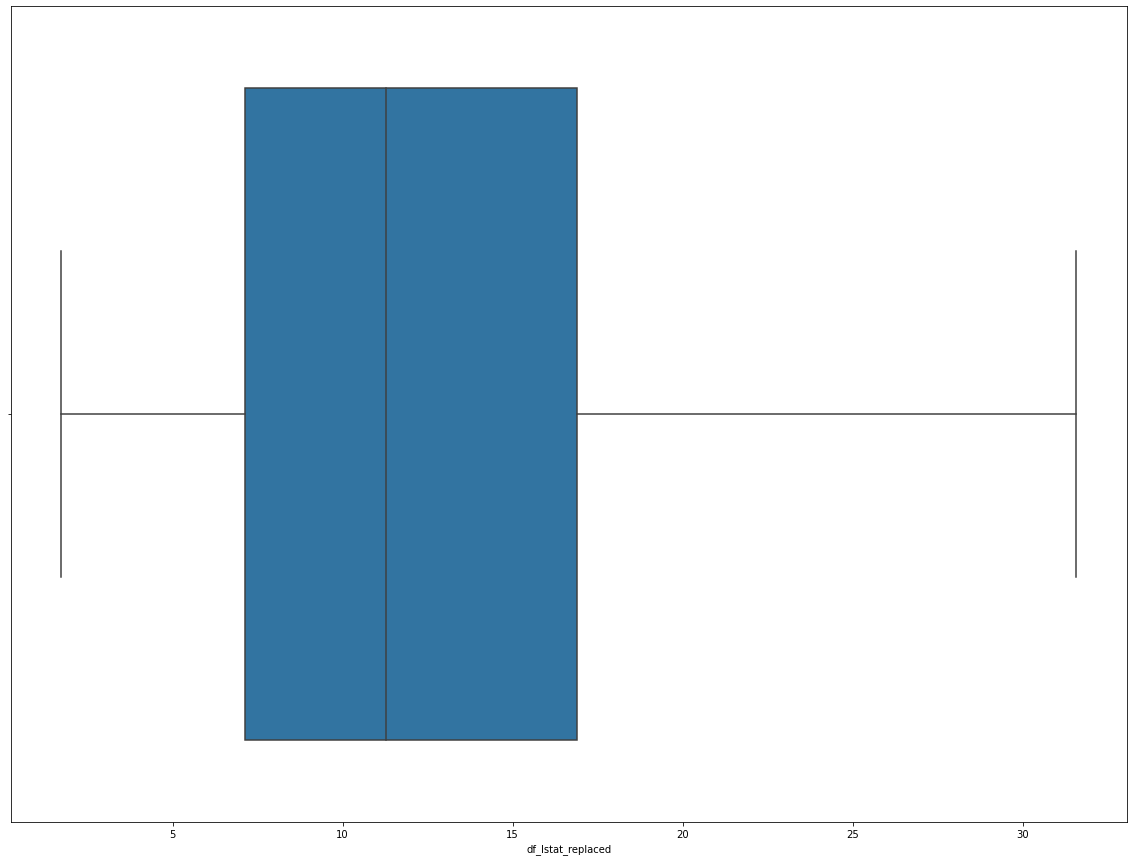

In [142]:
# Replacing values in lstat column
IQR = data['lstat'].quantile(0.75) - data['lstat'].quantile(0.25)
lower_limit = data['lstat'].quantile(0.25) - (IQR * 1.5)
upper_limit = data['lstat'].quantile(0.75) + (IQR * 1.5)
IQR

data['df_lstat_replaced'] = pd.DataFrame(np.where(data['lstat'] > upper_limit, upper_limit, np.where(data['lstat'] < lower_limit, lower_limit, data['lstat'])))
sns.boxplot(data.df_lstat_replaced) # We replaced all outliers value with their upper limit or lower limit.

C:\Users\jaich\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='df_medv_replaced'>

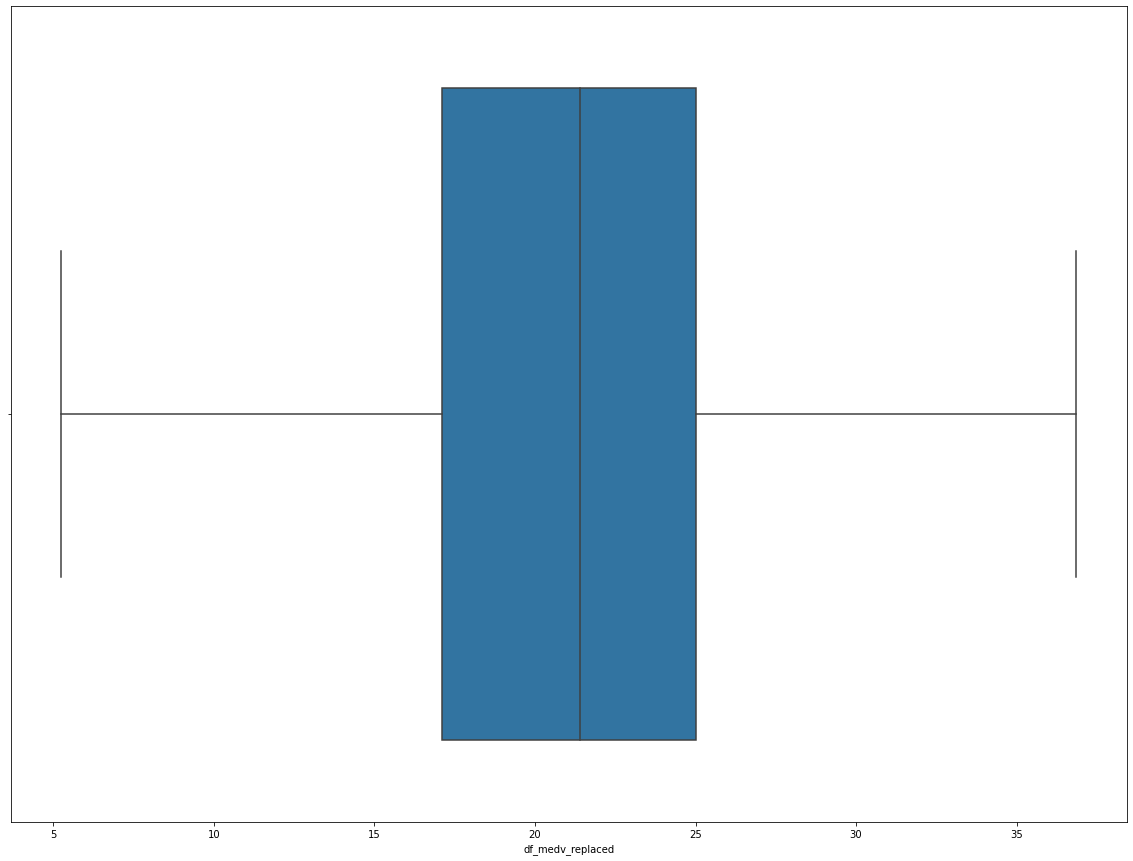

In [143]:
# Replacing values in medv column
IQR = data['medv'].quantile(0.75) - data['medv'].quantile(0.25)
lower_limit = data['medv'].quantile(0.25) - (IQR * 1.5)
upper_limit = data['medv'].quantile(0.75) + (IQR * 1.5)
IQR

data['df_medv_replaced'] = pd.DataFrame(np.where(data['medv'] > upper_limit, upper_limit, np.where(data['medv'] < lower_limit, lower_limit, data['medv'])))
sns.boxplot(data.df_medv_replaced) # We replaced all outliers value with their upper limit or lower limit.

Now we have changed all outliers to their nearest Upper or Lower limit, we can see there are additional columns in the dataset, we can easily drop the historical columns and use only the replaced columns for analysis

In [144]:
data.shape

(404, 23)

In [145]:
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv', 'df_replaced', 'df_zn_replaced',
       'df_chas_replaced', 'df_rm_replaced', 'df_dis_replaced',
       'df_ptratio_replaced', 'df_black_replaced', 'df_lstat_replaced',
       'df_medv_replaced'],
      dtype='object')

In [146]:
columns_to_drop = ['crim', 'zn', 'chas', 'rm', 'dis',
       'ptratio', 'black', 'lstat', 'medv']
columns_to_drop

['crim', 'zn', 'chas', 'rm', 'dis', 'ptratio', 'black', 'lstat', 'medv']

In [147]:
new_data = data.drop(columns=columns_to_drop)
new_data

,indus,nox,age,rad,tax,df_replaced,df_zn_replaced,df_chas_replaced,df_rm_replaced,df_dis_replaced,df_ptratio_replaced,df_black_replaced,df_lstat_replaced,df_medv_replaced
0,10.81,0.413,17.5,4.0,305.0,0.15876,0.00,0.0,5.961,5.2873,19.2,376.94000,9.88,21.70
1,5.13,0.453,47.2,8.0,284.0,0.10328,25.00,0.0,5.927,6.9320,19.7,396.90000,9.22,19.60
2,9.90,0.544,76.7,4.0,304.0,0.34940,0.00,0.0,5.972,3.1025,18.4,396.24000,9.97,20.30
3,19.58,0.871,94.9,5.0,403.0,2.73397,0.00,0.0,5.597,1.5257,14.7,351.85000,21.45,15.40
4,5.64,0.439,63.0,4.0,243.0,0.04337,21.00,0.0,6.115,6.8147,16.8,393.97000,9.43,20.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,18.10,0.713,98.7,24.0,666.0,9.32909,0.00,0.0,6.185,2.2616,20.2,396.90000,18.13,14.10
400,18.10,0.597,100.0,24.0,666.0,10.00932,0.00,0.0,5.757,1.4130,20.2,342.76375,10.11,15.00
401,1.21,0.401,24.8,1.0,198.0,0.01501,31.25,0.0,7.719,5.8850,13.6,395.52000,3.16,36.85
402,0.74,0.410,35.7,2.0,313.0,0.02055,31.25,0.0,6.383,9.1876,17.3,396.90000,5.77,24.70


In [148]:
new_data.columns

Index(['indus', 'nox', 'age', 'rad', 'tax', 'df_replaced', 'df_zn_replaced',
       'df_chas_replaced', 'df_rm_replaced', 'df_dis_replaced',
       'df_ptratio_replaced', 'df_black_replaced', 'df_lstat_replaced',
       'df_medv_replaced'],
      dtype='object')

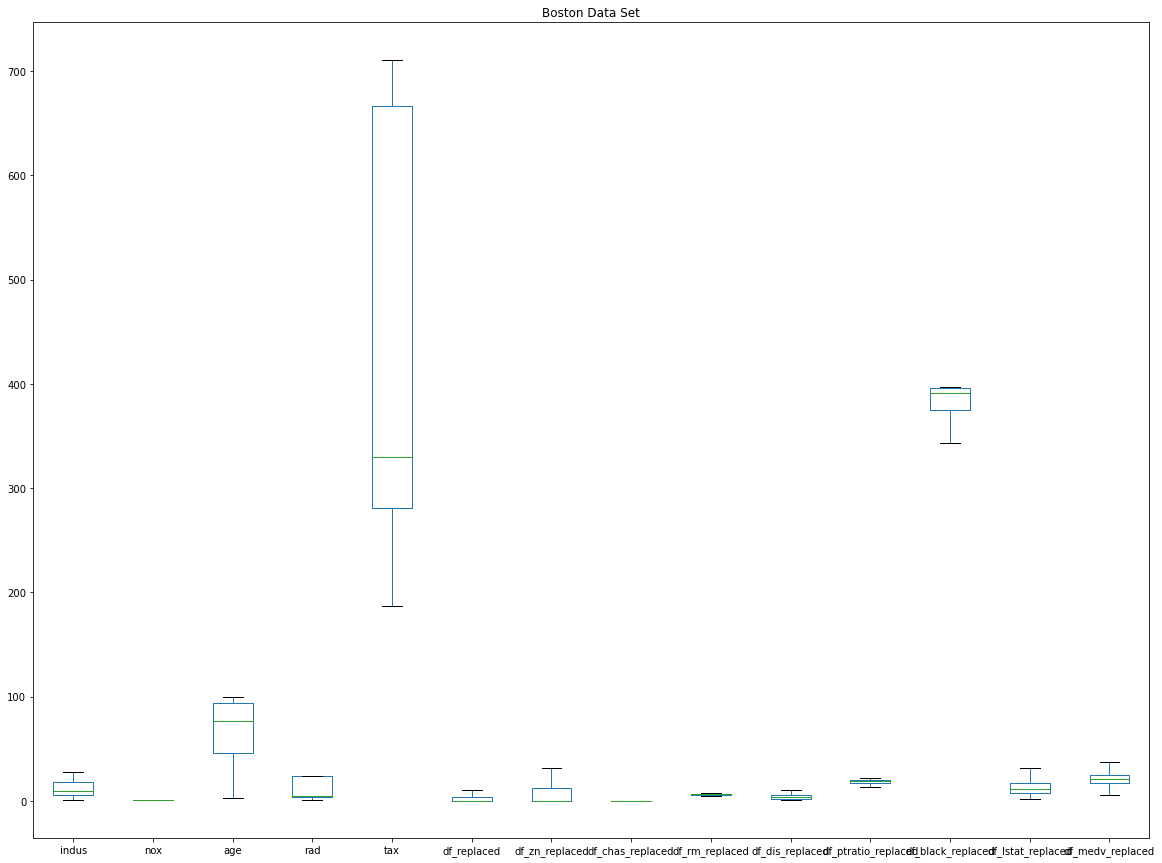

In [149]:
plt.rcParams['figure.figsize'] = (20,15)
new_data[['indus', 'nox', 'age', 'rad', 'tax', 'df_replaced', 'df_zn_replaced',
       'df_chas_replaced', 'df_rm_replaced', 'df_dis_replaced',
       'df_ptratio_replaced', 'df_black_replaced', 'df_lstat_replaced',
       'df_medv_replaced']].plot(kind='box', title='Boston Data Set')
plt.show()

## New data does not show any outliers and we did not loose any data from our data set

# Lets use Windsorizer method to replace outliers with their respective Upper Limit or Lower Limit

In [108]:
## Lets reload the data

In [109]:
df = pd.read_csv('boston_data.csv')

In [116]:
from feature_engine.outliers import Winsorizer

In [113]:
#!pip install feature_engine

  Using cached feature_engine-1.0.2-py2.py3-none-any.whl (152 kB)


In [117]:
winsor = Winsorizer(capping_method='iqr', # Selecting IQR method
                   tail='both', # using it to replace both the sides
                   fold = 1.5, # selecting the threshold of 1.5
                   variables=['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv']) # Providing a list of columns which needs to be ammended
df_t = winsor.fit_transform(df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv']])

In [118]:
df_t

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.00,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94000,9.88,21.70
1,0.10328,25.00,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90000,9.22,19.60
2,0.34940,0.00,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24000,9.97,20.30
3,2.73397,0.00,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85000,21.45,15.40
4,0.04337,21.00,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97000,9.43,20.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,9.32909,0.00,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90000,18.13,14.10
400,10.00932,0.00,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,342.76375,10.11,15.00
401,0.01501,31.25,1.21,0.0,0.401,7.719,24.8,5.8850,1.0,198.0,13.6,395.52000,3.16,36.85
402,0.02055,31.25,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90000,5.77,24.70


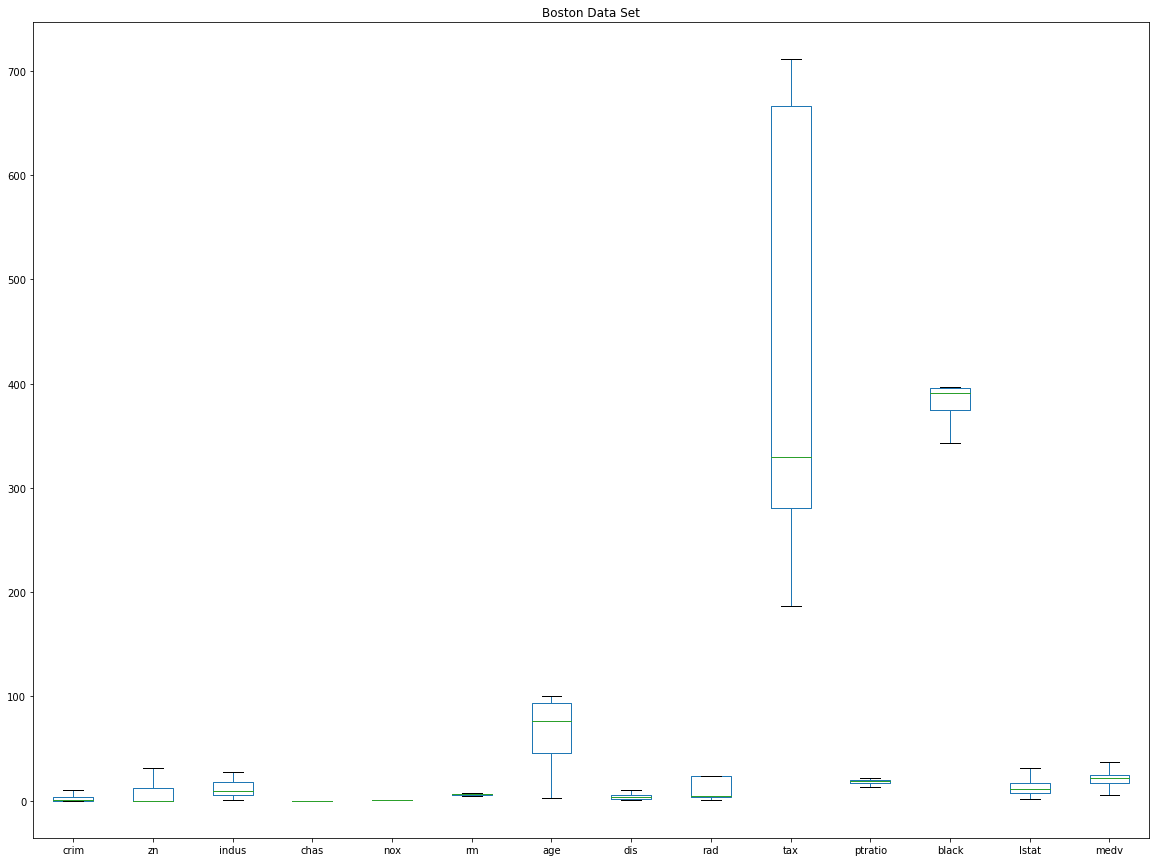

In [119]:
plt.rcParams['figure.figsize'] = (20,15)
df_t[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv']].plot(kind='box', title='Boston Data Set')
plt.show()

As we can see from the above chart all the outliers are converted to their respective Upper limit or Lower Limi

In [120]:
df_t.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.0,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,2.411491,6.655322,11.189901,0.0,0.556710,6.293507,68.601733,3.787040,9.836634,411.688119,18.451609,381.434205,12.585953,21.754827
std,3.582254,11.766632,6.814909,0.0,0.117321,0.601909,28.066143,2.068639,8.834741,171.073553,2.132154,19.478222,6.886921,7.421437
min,0.006320,0.000000,0.460000,0.0,0.392000,4.813000,2.900000,1.169100,1.000000,187.000000,13.137500,342.763750,1.730000,5.250000
25%,0.082382,0.000000,5.190000,0.0,0.453000,5.902750,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.0,0.538000,6.230500,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.0,0.631000,6.629250,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,10.009320,31.250000,27.740000,0.0,0.871000,7.719000,100.000000,9.923500,24.000000,711.000000,22.000000,396.900000,31.572500,36.850000


In [122]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000
